# 1. Estatísticas descritivas

# 1.1 Exploração dos dados e correções

In [1]:
# Dados de 2020, retirados do site Kaggle

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statistics
from scipy import stats

df = pd.read_csv('Dados/Kaggle/brazil_houses_to_rent_v2.csv')
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [2]:
#Vrificando a dimensão do data frame

df.shape

(10692, 13)

In [3]:
# Renomear as colunas para melhorar a compreensão e facilitar slicing

df = df.rename(columns = {'city':'cidade','rooms':'quartos','bathroom':'banheiros','parking spaces':'vagas_estacionamento',\
                          'floor':'andar','furniture':'mobiliado','hoa (R$)':'condominio', 'rent amount (R$)': 'aluguel',\
                          'property tax (R$)':'IPTU','fire insurance (R$)': 'seguro_incendio', 'total (R$)':'valor_total'})
df.head()

,cidade,area,quartos,banheiros,vagas_estacionamento,andar,animal,mobiliado,condominio,aluguel,IPTU,seguro_incendio,valor_total
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [4]:
df.info()

# Sem objetos nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
cidade                  10692 non-null object
area                    10692 non-null int64
quartos                 10692 non-null int64
banheiros               10692 non-null int64
vagas_estacionamento    10692 non-null int64
andar                   10692 non-null object
animal                  10692 non-null object
mobiliado               10692 non-null object
condominio              10692 non-null int64
aluguel                 10692 non-null int64
IPTU                    10692 non-null int64
seguro_incendio         10692 non-null int64
valor_total             10692 non-null int64
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [5]:
df.describe()

# Média da área tem um desvio padrao maior do que a média, vamos verificar a distribuição dos ...

,area,quartos,banheiros,vagas_estacionamento,condominio,aluguel,IPTU,seguro_incendio,valor_total
count,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


In [6]:
# Analisando a distribuição por cidade e verificando se nao há duplicatas no estilo 'São Paulo' e 'são paulo'

df.cidade.value_counts(normalize=True)

São Paulo         0.550599
Rio de Janeiro    0.140385
Belo Horizonte    0.117658
Porto Alegre      0.111579
Campinas          0.079779
Name: cidade, dtype: float64

In [7]:
# Coluna 'andar'

df.andar.value_counts()

# Considerando que imóveis sem sinalização de andar, iremos considerar que o sinal '-' é para casas.

-      2461
1      1081
2       985
3       931
4       748
5       600
6       539
7       497
8       490
9       369
10      357
11      303
12      257
13      200
14      170
15      147
16      109
17       96
18       75
19       53
20       44
21       42
25       25
23       25
22       24
26       20
24       19
27        8
28        6
29        5
32        2
51        1
301       1
46        1
35        1
Name: andar, dtype: int64

In [8]:
# Visualizando as diferenças entre os imóveis com e sem andar assinalado

print('Sem andar')
print(df[df.andar == '-'].mean())
print('\n')
print('Com andar')
print(df[df.andar != '-'].mean())

df_casa = df[df.andar == '-']
df = df[df.andar != '-']

# É provável que os imóveis sem andar assinalado, por terem uma área média maior, serem casas térreas.\
# Vamos separar os imóveis que sabemos serem apartamentos, dos outros imóveis

Sem andar
area                     231.622105
quartos                    3.054043
banheiros                  2.826493
vagas_estacionamento       2.428281
condominio               134.710687
aluguel                 4946.346201
IPTU                     440.172288
seguro_incendio           76.196262
valor_total             5597.558716
dtype: float64


Com andar
area                     124.579759
quartos                    2.342243
banheiros                  2.060503
vagas_estacionamento       1.364233
condominio              1484.766978
aluguel                 3582.276394
IPTU                     344.738063
seguro_incendio           46.455352
valor_total             5458.473454
dtype: float64


In [9]:
# Tranformando os valores da coluna 'andar' de objetos para números inteiros

df.andar.astype('int64')

0         7
1        20
2         6
3         2
4         1
         ..
10686     8
10687     5
10688    17
10689     8
10690     8
Name: andar, Length: 8231, dtype: int64

In [10]:
# Trocando os valores, de palavras para números, das colunas 'animal' e 'mobiliado', para trabalhar os dados

df.replace({'animal':{'acept': 1, 'not acept': 0}, 'mobiliado':{'furnished': 1, 'not furnished': 0}}, inplace=True)

df.head()

,cidade,area,quartos,banheiros,vagas_estacionamento,andar,animal,mobiliado,condominio,aluguel,IPTU,seguro_incendio,valor_total
0,São Paulo,70,2,1,1,7,1,1,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,1,0,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,1,0,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,1,0,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,0,0,0,800,25,11,836


In [11]:
# Agregando as colunas por cidade

df.groupby(by='cidade').sum()

,area,quartos,banheiros,vagas_estacionamento,animal,mobiliado,condominio,aluguel,IPTU,seguro_incendio,valor_total
cidade,,,,,,,,,,,
Belo Horizonte,161283,2533,1990,1514,655,133,2911491,2700118,232262,36240,5880669
Campinas,70311,1386,1101,767,515,97,480526,1257070,72697,16158,1826462
Porto Alegre,83382,1975,1563,863,837,274,560623,2038635,102283,30251,2731810
Rio de Janeiro,138859,3065,2396,1010,1112,393,1600418,4428215,357793,57360,6443802
São Paulo,571581,10320,9910,7075,3204,1355,6668059,19061679,2072504,242365,28045952


# 1.2 Aluguel

In [12]:
# Calculando a faixa de preço que contém 80% dos apartamentos

    
oitenta_pct = int(round(len(df.aluguel)*0.80, 0))

maxi = max(df.aluguel.sort_values()[: oitenta_pct])

print ('80% dos apartamentos tem um aluguel na faixa de', min(df.aluguel), 'a', maxi, 'reais')

print("\n")
print(df.aluguel.describe())

80% dos apartamentos tem um aluguel na faixa de 460 a 5100 reais


count     8231.000000
mean      3582.276394
std       3138.226949
min        460.000000
25%       1500.000000
50%       2500.000000
75%       4405.000000
max      24000.000000
Name: aluguel, dtype: float64


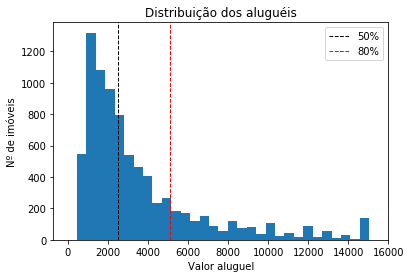

Mediana:  2500.0


In [13]:
# Visualização da disbruição de aluguéis dos apartamentos em um histograma 

plt.hist(df.aluguel, bins=50)
plt.axvline(df.aluguel.median(), color='k', linestyle='dashed', linewidth=1, label='50%')
plt.axvline(maxi, color='r', linestyle='dashed', linewidth=1, label='80%')
plt.legend(loc='upper right')
plt.xlabel('Valor aluguel')
plt.ylabel('Nº de imóveis')
plt.title('Distribuição dos aluguéis')
plt.xlim(right=16000)
plt.show()


print('Mediana: ', df.aluguel.median())
# Claramnte a distribuição não é normal, se aproximando mais de uma distribuição exponencial

In [14]:
# Visualizando as diferenças de médias de aluguel por cidade

cidades_df = df.groupby(by='cidade').agg({'aluguel': [np.mean, np.median, np.std, len]}).sort_values(by=[('aluguel',   'mean')], ascending=False)
cidades_df

# São Paulo possui o aluguel mais caro e Campinas possui o mas barato. Podemos porém, afirmar que o Rio é mais caro que BH?

aluguel                          
                       mean median          std   len
cidade                                               
São Paulo       4460.959279   3230  3423.462162  4273
Rio de Janeiro  3176.624821   2300  2663.961508  1394
Belo Horizonte  2947.727074   1800  2952.030907   916
Porto Alegre    2040.675676   1600  1689.417154   999
Campinas        1936.933744   1275  1862.710970   649

In [15]:
# Criando uma lista de Ordenando as cidades por valor de aluguel

cidades_por_aluguel = cidades_df.index
cidades_por_aluguel

Index(['São Paulo', 'Rio de Janeiro', 'Belo Horizonte', 'Porto Alegre',
       'Campinas'],
      dtype='object', name='cidade')

[Text(0.5, 1.0, 'Distribuição dos aluguéis por cidade')]

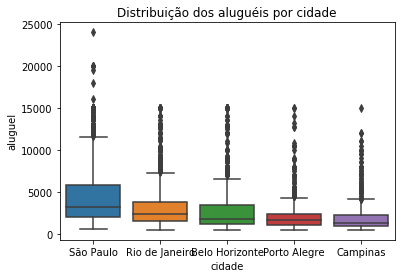

In [16]:
# Distribuição dos aluguéis por cidade

ax = sns.boxplot(x='cidade', y='aluguel', data=df, order=cidades_por_aluguel)
ax.set(title='Distribuição dos aluguéis por cidade')

# 1.3 Área

In [17]:
# Calcular a faixa de área que contém 80% dos imóveis

oitenta_pct_area = int(round(len(df.area)*0.80, 0))

maxi_area = max(df.area.sort_values()[: oitenta_pct_area])

print ('80% dos apartamentos tem a área na faixa de', min(df.area), 'a', maxi_area, 'metros')

print('\n')
print(df.area.describe())

80% dos apartamentos tem a área na faixa de 11 a 168 metros


count     8231.000000
mean       124.579759
std        601.034331
min         11.000000
25%         54.000000
50%         80.000000
75%        141.000000
max      46335.000000
Name: area, dtype: float64


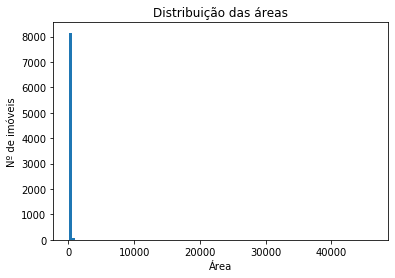

In [18]:
# Distribuição da área dos apartamentos em um histograma 

plt.hist(df.area, bins=100)
plt.xlabel('Área')
plt.ylabel('Nº de imóveis')
plt.title('Distribuição das áreas')
plt.show()

# Algo está errado

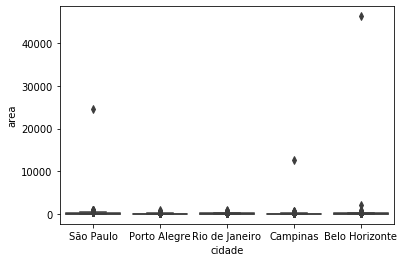

In [19]:
# Distribuição da área dos apartamentos por cidade

sns.boxplot(x='cidade', y='area', data=df)

# Outliers estão prejudicando a visualização

In [20]:
# Conhecendo outliers

df[df.area > 10000]

,cidade,area,quartos,banheiros,vagas_estacionamento,andar,animal,mobiliado,condominio,aluguel,IPTU,seguro_incendio,valor_total
2397,Belo Horizonte,46335,4,8,5,11,1,1,960,8500,646,114,10220
5915,São Paulo,24606,5,4,4,12,1,0,2254,8100,7859,103,18320
9241,Campinas,12732,3,2,0,3,1,0,700,1600,96,21,2417


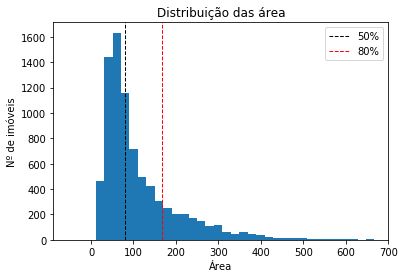

In [21]:
# Criar data frame df_viz, apenas para visualização, sem os outliers
df_viz = df[df.area < 10000]

# Visualização das área em histograma

plt.hist(df_viz.area, bins=100)
plt.axvline(df_viz.area.median(), color='k', linestyle='dashed', linewidth=1, label='50%')
plt.axvline(maxi_area, color='r', linestyle='dashed', linewidth=1, label='80%')
plt.legend(loc='upper right')
plt.xlabel('Área')
plt.ylabel('Nº de imóveis')
plt.title('Distribuição das área')
plt.xlim(right=700)
plt.show()

In [22]:
# Visualizando as diferenças de médias de aluguel por cidade

cidades_area_df = df.groupby(by='cidade').agg({'area': [np.mean, np.median, np.std,\
                                                        len]}).sort_values(by=[('area',   'mean')], ascending=False)
cidades_area_df

area                          
                      mean median          std   len
cidade                                              
Belo Horizonte  176.073144     90  1531.043393   916
São Paulo       133.765738     90   388.863184  4273
Campinas        108.337442     68   501.209542   649
Rio de Janeiro   99.611908     80    81.315499  1394
Porto Alegre     83.465465     66    68.445644   999

[Text(0.5, 1.0, 'Área por cidade')]

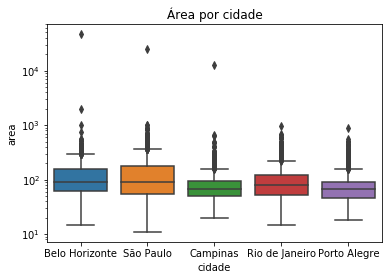

In [23]:
# Distribuição da área dos apartamntos por cidade, agora em log

cidades_por_area = cidades_area_df.index
cidades_por_area

g = sns.boxplot(x='cidade', y='area', data=df, order=cidades_por_area)
g.set_yscale("log")
g.set(title='Área por cidade')

# 1.4 Cômodos

2    0.306524
3    0.303122
1    0.251488
4    0.127324
5    0.010448
6    0.000850
7    0.000243
Name: quartos, dtype: float64


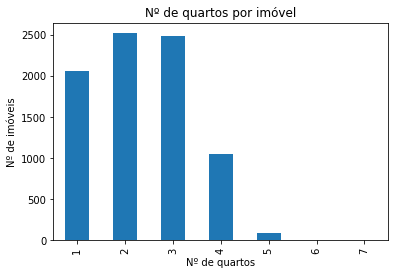

In [24]:
# Visualização do imóveis por número de quartos

df.quartos.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Nº de quartos')
plt.ylabel('Nº de imóveis')
plt.title('Nº de quartos por imóvel')

print(df.quartos.value_counts(normalize=True))

1    0.436277
2    0.291459
3    0.124043
4    0.090390
5    0.043008
6    0.011542
7    0.003037
9    0.000121
8    0.000121
Name: banheiros, dtype: float64


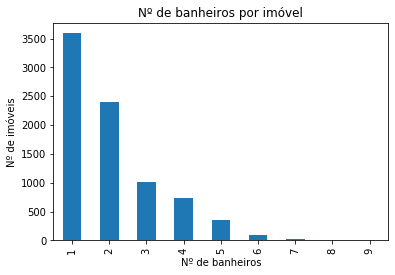

In [25]:
# Visualização do imóveis por número de banheiros

df.banheiros.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Nº de banheiros')
plt.ylabel('Nº de imóveis')
plt.title('Nº de banheiros por imóvel')

print(df.banheiros.value_counts(normalize=True)) 

1    0.399830
0    0.248451
2    0.192929
3    0.083708
4    0.056494
5    0.012392
6    0.004738
8    0.000850
7    0.000607
Name: vagas_estacionamento, dtype: float64


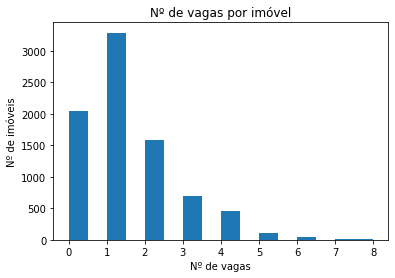

In [26]:
# Visualização da disbruição das vagas de estacionamento por imóvel 

plt.hist(df.vagas_estacionamento, bins=16)
plt.xlabel('Nº de vagas')
plt.ylabel('Nº de imóveis')
plt.title('Nº de vagas por imóvel')

print(df.vagas_estacionamento.value_counts(normalize=True))

# 1.5 Adicionando variável (metro quadrado)

In [27]:
# Criando coluna de aluguel por metro quadrado

df['aluguel_m2'] = df.aluguel/df.area
df.head()

,cidade,area,quartos,banheiros,vagas_estacionamento,andar,animal,mobiliado,condominio,aluguel,IPTU,seguro_incendio,valor_total,aluguel_m2
0,São Paulo,70,2,1,1,7,1,1,2065,3300,211,42,5618,47.142857
1,São Paulo,320,4,4,0,20,1,0,1200,4960,1750,63,7973,15.500000
2,Porto Alegre,80,1,1,1,6,1,0,1000,2800,0,41,3841,35.000000
3,Porto Alegre,51,2,1,0,2,1,0,270,1112,22,17,1421,21.803922
4,São Paulo,25,1,1,0,1,0,0,0,800,25,11,836,32.000000


In [28]:
# Calcular a faixa de área que contém 80% dos imóveis

oitenta_pct_m2 = int(round(len(df.aluguel_m2)*0.80, 0))

maxi_m2 = max(df.aluguel_m2.sort_values()[: oitenta_pct_m2])

print ('80% dos apartamentos tem o aluguel por metro quadrado na faixa de',\
       round(min(df.aluguel_m2),2), 'a', round(maxi_m2,2), 'metros')

df.aluguel_m2.describe()

80% dos apartamentos tem o aluguel por metro quadrado na faixa de 0.13 a 49.23 metros


count    8231.000000
mean       35.952534
std        24.053555
min         0.125668
25%        20.000000
50%        29.037433
75%        44.336478
max       300.000000
Name: aluguel_m2, dtype: float64

Valor mediano:  29.037433155080215


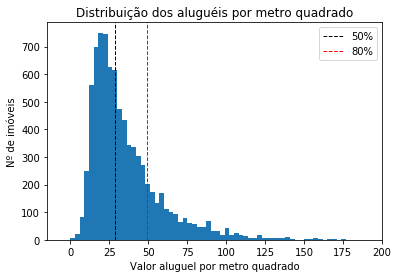

In [29]:
oitenta_pct_m2 = int(round(len(df.aluguel_m2)*0.80, 0))

maxi_m2 = max(df.aluguel_m2.sort_values()[: oitenta_pct_m2])

plt.hist(df.aluguel_m2, bins=100)
plt.axvline(df.aluguel_m2.median(), color='k', linestyle='dashed', linewidth=1, label='50%')
plt.axvline(maxi_m2, color='r', linestyle='dashed', linewidth=1, label='80%')
plt.legend(loc='upper right')
plt.xlabel('Valor aluguel por metro quadrado')
plt.ylabel('Nº de imóveis')
plt.title('Distribuição dos aluguéis por metro quadrado')
plt.xlim(right=200)

print('Valor mediano: ', df.aluguel_m2.median())

In [30]:
# Visualizando as diferenças de aluguel por m2 por cidade

cidades_m2_df = df.groupby(by='cidade').agg({'aluguel_m2': [np.mean, np.median, np.std,\
                                                        len]}).sort_values(by=[('aluguel_m2',   'mean')], ascending=False)

cidades_m2_df

# Porto Alegre é possui um alugul por metro uadrado maior do que o de Belo Horizonte, porém, essa diferença é significativa?

aluguel_m2                              
                     mean     median        std     len
cidade                                                 
São Paulo       42.787661  35.000000  27.328553  4273.0
Rio de Janeiro  35.567199  30.116959  20.637110  1394.0
Porto Alegre    26.715748  23.250000  13.177928   999.0
Belo Horizonte  24.527097  20.027778  13.856174   916.0
Campinas        22.121883  18.959108  12.427415   649.0

[Text(0.5, 1.0, 'Distribuição do aluguel por m2 por cidade')]

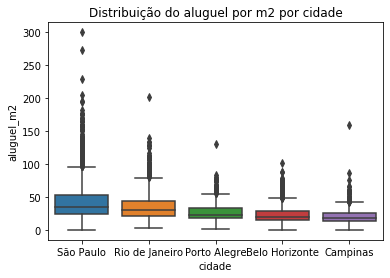

In [31]:
# Custo do metro quadrado por cidade

ax = sns.boxplot(x='cidade', y='aluguel_m2', data=df, order = cidades_m2_df.index)
ax.set(title='Distribuição do aluguel por m2 por cidade')

# 2. Testes

# 2.1 Teste qui-quadrado de qualidade do ajuste da amostra

In [32]:
# Vamos verificar se a frequencia observada das cidades é significativa, quando comparada com a frequencia esperada

# Para definir a frequencia esperada, foi utilizado o número de domicílios por cidade, da Censo de 2010

domicilios_cidade = pd.read_excel('Dados/tabela3152.xlsx')
domicilios_cidade.head(10)

,"Tabela 3152 - Domicílios particulares permanentes, por tipo do domicílio e número de moradores - Resultados Preliminares do Universo",Unnamed: 1,Unnamed: 2
0,Variável - Domicílios particulares permanentes...,NaN,NaN
1,Município,Número de moradores,Ano x Tipo de domicílio
2,NaN,NaN,2010
3,NaN,NaN,Apartamento
4,Alta Floresta D'Oeste (RO),Total,15
5,Ariquemes (RO),Total,2236
6,Cabixi (RO),Total,1
7,Cacoal (RO),Total,1161
8,Cerejeiras (RO),Total,34
9,Colorado do Oeste (RO),Total,16


In [33]:
domicilios_cidade.columns

Index(['Tabela 3152 - Domicílios particulares permanentes, por tipo do domicílio e número de moradores - Resultados Preliminares do Universo',
       'Unnamed: 1', 'Unnamed: 2'],
      dtype='object')

In [34]:
# Retirado colunas que não são úteis

domicilios_cidade.drop(columns=['Unnamed: 1'], index=[0,1,2,3], inplace=True)
domicilios_cidade.head()

,"Tabela 3152 - Domicílios particulares permanentes, por tipo do domicílio e número de moradores - Resultados Preliminares do Universo",Unnamed: 2
4,Alta Floresta D'Oeste (RO),15
5,Ariquemes (RO),2236
6,Cabixi (RO),1
7,Cacoal (RO),1161
8,Cerejeiras (RO),34


In [35]:
# Renomeando as colunas

domicilios_cidade.rename(columns = {'Tabela 3152 - Domicílios particulares permanentes, por tipo do domicílio e número de moradores - Resultados Preliminares do Universo'\
                                    : 'cidade', 'Unnamed: 2': 'unidades'}, inplace = True)
domicilios_cidade.reset_index(inplace=True, drop=True)
domicilios_cidade.head()

,cidade,unidades
0,Alta Floresta D'Oeste (RO),15
1,Ariquemes (RO),2236
2,Cabixi (RO),1
3,Cacoal (RO),1161
4,Cerejeiras (RO),34


In [36]:
# Filtrando apenas para as cidades que queremos

domicilios_cidade_selecionado = domicilios_cidade[domicilios_cidade.cidade.isin(['São Paulo (SP)', 'Rio de Janeiro (RJ)', \
                                                                               'Belo Horizonte (MG)', 'Porto Alegre (RS)',\
                                                                               'Campinas (SP)'])]

domicilios_cidade_selecionado.replace({'cidade':{'São Paulo (SP)': 'São Paulo',\
                                                  'Rio de Janeiro (RJ)': 'Rio de Janeiro',\
                                                 'Belo Horizonte (MG)': 'Belo Horizonte',\
                                                  'Porto Alegre (RS)':'Porto Alegre',\
                                                 'Campinas (SP)': 'Campinas'}},inplace=True)

domicilios_cidade_selecionado

C:\Users\gabri\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:6702: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regex=regex,


,cidade,unidades
2308,Belo Horizonte,251275
3241,Rio de Janeiro,806769
3374,Campinas,85011
3828,São Paulo,1009636
4927,Porto Alegre,237297


In [37]:
# Adicionando uma coluna 'Frequencia'

domicilios_cidade_selecionado['frequencia'] = domicilios_cidade_selecionado.unidades/(domicilios_cidade_selecionado.unidades.sum())
domicilios_cidade_selecionado.head()

C:\Users\gabri\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,cidade,unidades,frequencia
2308,Belo Horizonte,251275,0.105137
3241,Rio de Janeiro,806769,0.337562
3374,Campinas,85011,0.0355696
3828,São Paulo,1009636,0.422444
4927,Porto Alegre,237297,0.0992879


In [38]:
# Dada essa frequencia encontrada, qual seria o número de imoveis por cidade esperado
# Ordenando por número de unidades

domicilios_cidade_selecionado['unidades_esperado'] = domicilios_cidade_selecionado.frequencia * df.cidade.count()

domicilios_cidade_selecionado.sort_values(by='unidades', ascending=False, inplace=True)
domicilios_cidade_selecionado

C:\Users\gabri\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\gabri\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,cidade,unidades,frequencia,unidades_esperado
3828,São Paulo,1009636,0.422444,3477.14
3241,Rio de Janeiro,806769,0.337562,2778.47
2308,Belo Horizonte,251275,0.105137,865.379
4927,Porto Alegre,237297,0.0992879,817.239
3374,Campinas,85011,0.0355696,292.774


In [39]:
# Obtendo o número de imóveis por cidade 

freq_cidade_obs = df.cidade.value_counts()
freq_cidade_obs

São Paulo         4273
Rio de Janeiro    1394
Porto Alegre       999
Belo Horizonte     916
Campinas           649
Name: cidade, dtype: int64

In [40]:
# Transformando a série gerada com o 'values_count' em data frame

freq_cidade_obs = pd.DataFrame({'cidade': freq_cidade_obs.index, 'unidades_obs': freq_cidade_obs.values})
freq_cidade_obs

,cidade,unidades_obs
0,São Paulo,4273
1,Rio de Janeiro,1394
2,Porto Alegre,999
3,Belo Horizonte,916
4,Campinas,649


In [41]:
# Unindo os data frames 'domicilios_cidade_selecionado', que possui os dados do Censo, com 'freq_cidade_obs' dados do Kaggle

df_freq_cidades = pd.merge(domicilios_cidade_selecionado, freq_cidade_obs, on='cidade')
df_freq_cidades

,cidade,unidades,frequencia,unidades_esperado,unidades_obs
0,São Paulo,1009636,0.422444,3477.14,4273
1,Rio de Janeiro,806769,0.337562,2778.47,1394
2,Belo Horizonte,251275,0.105137,865.379,916
3,Porto Alegre,237297,0.0992879,817.239,999
4,Campinas,85011,0.0355696,292.774,649


In [42]:
# Rodando um teste qui-quadrado de qualidade do ajuste (Goodness-Of-Fit) 

stats.chisquare(f_obs = df_freq_cidades.unidades_obs, f_exp = df_freq_cidades.unidades_esperado)


# Hipotese nula rejeitada, as distribuiçõs não possuem a mesma frequência

Power_divergenceResult(statistic=1348.8409959637863, pvalue=8.559994402679104e-291)

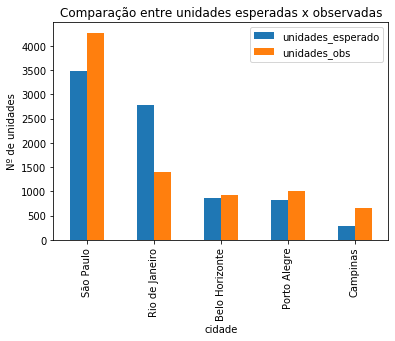

In [43]:
df_freq_cidades_viz = df_freq_cidades.drop(columns=['unidades', 'frequencia'])
df_freq_cidades_viz.set_index('cidade', inplace=True)
df_freq_cidades_viz.plot(kind="bar")
plt.title('Comparação entre unidades esperadas x observadas')
plt.ylabel('Nº de unidades')
plt.show()

# 2.2 Teste de duas amostras (média e mediana)

# 2.2.1 Aluguel do Rio de Janeiro x Belo Horizonte

In [44]:
# Testando a normalidade da distribuiução dos aluguéis

stats.normaltest(df.aluguel)

# P Valor igual a zero. Rejeitando a hipótese de que a distribuição é normal

NormaltestResult(statistic=3002.487357645163, pvalue=0.0)

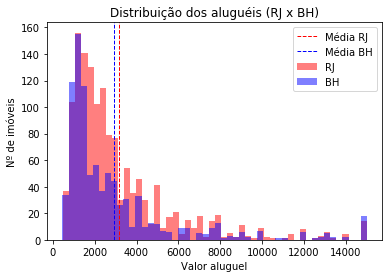

In [45]:
# Visualizando a diferença de médias

rj_aluguel = df.loc[df.cidade == 'Rio de Janeiro', 'aluguel']
bh_aluguel = df.loc[df.cidade == 'Belo Horizonte', 'aluguel']

plt.hist(rj_aluguel, alpha=0.5, label = 'RJ', bins = 50, color='red')
plt.hist(bh_aluguel, alpha=0.5, label = 'BH', bins = 50, color='blue')
plt.axvline(rj_aluguel.mean(), color='red', linestyle='dashed', linewidth=1, label='Média RJ')
plt.axvline(bh_aluguel.mean(), color='blue', linestyle='dashed', linewidth=1, label='Média BH')
plt.xlabel('Valor aluguel')
plt.ylabel('Nº de imóveis')
plt.title('Distribuição dos aluguéis (RJ x BH)')
plt.legend(loc='upper right')
plt.show()

[Text(0.5, 1.0, 'Aluguel de Rio de Janeiro x Belo Horizonte')]

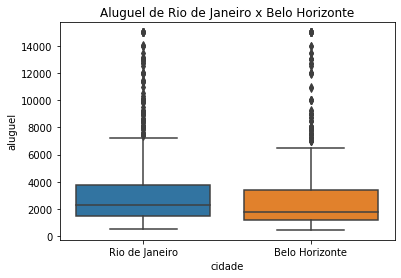

In [46]:
# Visualizando a diferença de medianas

ax = sns.boxplot(x='cidade', y='aluguel', data=df[(df.cidade == 'Belo Horizonte') | (df.cidade == 'Rio de Janeiro')])
ax.set(title='Aluguel de Rio de Janeiro x Belo Horizonte')

In [47]:
# Teste de hipótse para a média das duas amostras

print(sm.stats.ztest(rj_aluguel, bh_aluguel))

print((rj_aluguel.mean() - bh_aluguel.mean())/bh_aluguel.mean())


# Os imóveis do Rio de Janeiro são, em média, 8% mais caros do os de Belo Horizonte.

(1.9346328897410452, 0.05303536102853657)
0.0776522862054672


In [48]:
# Teste de hipótese para a mediana

print(stats.median_test(bh_aluguel, rj_aluguel))

print((rj_aluguel.median() - bh_aluguel.median())/bh_aluguel.median())

(21.493479541140132, 3.5503382222735926e-06, 2194.0, array([[403, 752],
       [513, 642]], dtype=int64))
0.2777777777777778


In [49]:
# Visualizando as diferenças do tamanho dos apartamentos

df.groupby(by='cidade').agg({'area': [np.mean, np.std, max, len]})

area                          
                      mean          std    max   len
cidade                                              
Belo Horizonte  176.073144  1531.043393  46335   916
Campinas        108.337442   501.209542  12732   649
Porto Alegre     83.465465    68.445644    900   999
Rio de Janeiro   99.611908    81.315499    950  1394
São Paulo       133.765738   388.863184  24606  4273

# 2.2.2 Área dos apartamentos São Paulo x Belo Horizonte

[Text(0.5, 1.0, 'Aluguel de São Paulo x Belo Horizonte')]

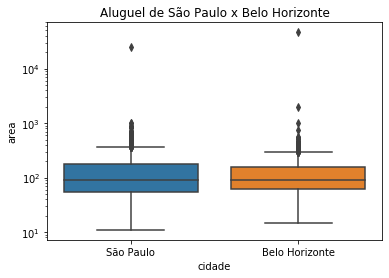

In [50]:
# Visualizando a área dos apartamentos em São Paulo e Belo Horizonte

ax = sns.boxplot(x='cidade', y='area', data=df[(df.cidade == 'São Paulo') | (df.cidade == 'Belo Horizonte')])
ax.set_yscale("log")
ax.set(title='Aluguel de São Paulo x Belo Horizonte')

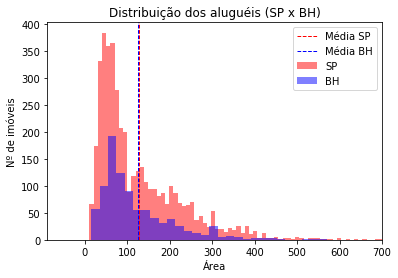

In [51]:
# Visualizando. Retirando os dados do data frame 

sp_area = df_viz.loc[df.cidade == 'São Paulo', 'area']
bh_area = df_viz.loc[df.cidade == 'Belo Horizonte', 'area']

plt.hist(sp_area, alpha=0.5, label = 'SP', bins = 100, color='red')
plt.hist(bh_area, alpha=0.5, label = 'BH', bins = 100, color='blue')
plt.axvline(sp_area.mean(), color='red', linestyle='dashed', linewidth=1, label='Média SP')
plt.axvline(bh_area.mean(), color='blue', linestyle='dashed', linewidth=1, label='Média BH')
plt.xlim(right=700)
plt.xlabel('Área')
plt.ylabel('Nº de imóveis')
plt.title('Distribuição dos aluguéis (SP x BH)')
plt.legend(loc='upper right')
plt.show()

In [52]:
# Teste de hipótse para a média das duas amostras, sem os outliers

sp_area = df_viz.loc[df_viz.cidade == 'São Paulo', 'area']
bh_area = df_viz.loc[df_viz.cidade == 'Belo Horizonte', 'area']

print(sm.stats.ztest(sp_area, bh_area))

print((sp_area.mean() - bh_area.mean())/bh_area.mean())


# A diferença de médias não é significante

(0.6213581109189411, 0.534364026888494)
0.019191769126283918


In [53]:
# Teste de hipótse para a média das duas amostras, com os outliers

sp_area = df.loc[df.cidade == 'São Paulo', 'area']
bh_area = df.loc[df.cidade == 'Belo Horizonte', 'area']

print(sm.stats.ztest(sp_area, bh_area))

print((sp_area.mean() - bh_area.mean())/bh_area.mean())


# Vemos que o nesse caso a diferença de médias aumenta bastante. Porém, a um p-valor de 0.05, o hipótese nula, de que as médias são iguais, não foi rejeitada. 

(-1.5840898870499012, 0.11317326540685728)
-0.24028312757620124


In [54]:
# Teste de hipótese para a mediana

print(stats.median_test(sp_area, bh_area))

print((sp_area.median() - bh_area.median())/bh_area.median())

# As medianas são rigorosamnte as mesmas

(0.018826725254990403, 0.890864400248042, 90.0, array([[2109,  455],
       [2164,  461]], dtype=int64))
0.0


# 2.2.3 Aluguel por metro quadrado do Porto Alegre x Belo Horizonte

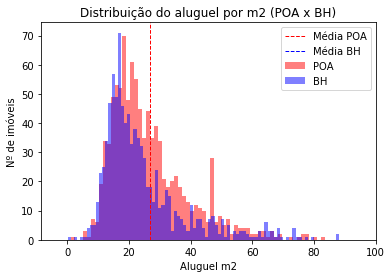

In [55]:
# Visualizando. Retirando os dados do data frame 

poa_aluguel_m2 = df.loc[df.cidade == 'Porto Alegre', 'aluguel_m2']
bh_aluguel_m2 = df.loc[df.cidade == 'Belo Horizonte', 'aluguel_m2']

plt.hist(poa_aluguel_m2, alpha=0.5, label = 'POA', bins = 100, color='red')
plt.hist(bh_aluguel_m2, alpha=0.5, label = 'BH', bins = 100, color='blue')
plt.axvline(poa_aluguel_m2.mean(), color='red', linestyle='dashed', linewidth=1, label='Média POA')
plt.axvline(bh_area.mean(), color='blue', linestyle='dashed', linewidth=1, label='Média BH')
plt.xlim(right=100)
plt.xlabel('Aluguel m2')
plt.ylabel('Nº de imóveis')
plt.title('Distribuição do aluguel por m2 (POA x BH)')
plt.legend(loc='upper right')
plt.show()

In [56]:
# Teste de hipótse para a média das duas amostras, com os outliers

print(sm.stats.ztest(poa_aluguel_m2, bh_aluguel_m2))

print((poa_aluguel_m2.mean() - bh_aluguel_m2.mean())/bh_aluguel_m2.mean())

# A diferença de 8,9% entre as médias é significativa. Porto Alegre possui um aluguel por metro quadrado maior

(3.542232460503813, 0.00039675566404832207)
0.0892340181315272


[Text(0.5, 1.0, 'Aluguel por m2 de Porto Alegre x Belo Horizonte')]

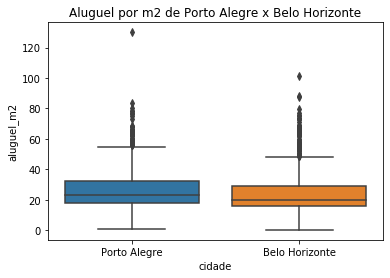

In [57]:
# Visualizando a difirença entr as medianas

ax = sns.boxplot(x='cidade', y='aluguel_m2', data=df[(df.cidade == 'Porto Alegre') | (df.cidade == 'Belo Horizonte')])
ax.set(title='Aluguel por m2 de Porto Alegre x Belo Horizonte')

In [58]:
# Teste de hipótese para a mediana

print(stats.median_test(poa_aluguel_m2, bh_aluguel_m2))

print((poa_aluguel_m2.median() - bh_aluguel_m2.median())/bh_aluguel_m2.median())

# Diferença significativa

(27.9487010051229, 1.2457455835682748e-07, 21.875, array([[557, 399],
       [442, 517]], dtype=int64))
0.16088765603328706


# 3. Modelo Preditivo

R é igual a 0.6533549571962767


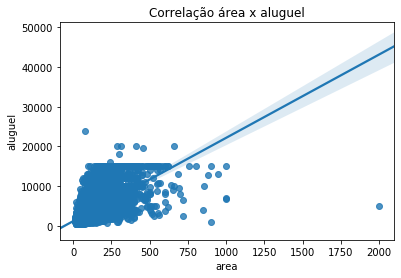

In [59]:
# Visualizando a dispersão e encontrando a correlação

ax = sns.regplot('area', 'aluguel', data=df_viz)
ax.set(title='Correlação área x aluguel')

r = np.corrcoef(df_viz.area, df_viz.aluguel)
print('R é igual a', r[1,0])

# Aparentemente há um valor próximo a 15.000, q funciona como um teto, para grande parte dos imoveis

In [60]:
# Encontrar a correlação área x aluguel para cada cidade

nomes_cidades = df.cidade.unique()

for i in nomes_cidades:
    data = df[df.cidade == i]
    r = np.corrcoef(data.area, data.aluguel)
    print(i, r[1,0])
    print('\n')
    
# Campinas possui a maior correlação área x aluguel e Belo Horizonte a menor

São Paulo 0.1895366066540881


Porto Alegre 0.6290686326613687


Rio de Janeiro 0.6666679906106247


Campinas 0.0969493484249391


Belo Horizonte 0.10898430664205601




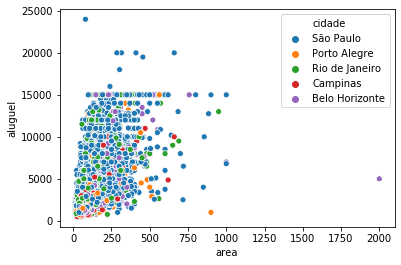

In [61]:
sns.scatterplot(x='area', y='aluguel', hue='cidade', data=df_viz)

In [62]:
# Regressao com minimos quadrados entre aluguel e área

model_quartos = sm.OLS.from_formula("aluguel ~ area", data=df_viz)
resultado_area = model_quartos.fit()
resultado_area.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                aluguel   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     6127.
Date:                Wed, 26 Aug 2020   Prob (F-statistic):               0.00
Time:                        21:16:29   Log-Likelihood:                -75631.
No. Observations:                8228   AIC:                         1.513e+05
Df Residuals:                    8226   BIC:                         1.513e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1179.0408     40.347     29.223      0.000    1099.951    1258.131
area          20.9891      0.268     78.274      0.000      20.463      21.515
==============================================================================
Omnibus:                     2256.162   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            61648.986
Skew:                           0.720   Prob(JB):                         0.00
Kurtosis:                      16.332   Cond. No.                         232.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

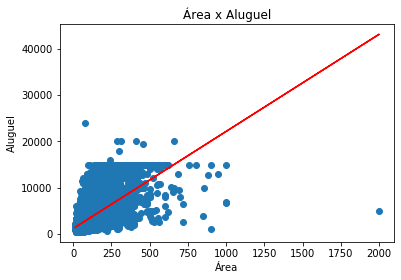

In [63]:
# Visualizando o modelo

plt.scatter(df_viz.area, df_viz.aluguel)
plt.plot(df_viz.area, df_viz.area*resultado_area.params['area'] + resultado_area.params['Intercept'], 'red')
plt.xlabel('Área')
plt.ylabel('Aluguel')
plt.title('Área x Aluguel')
plt.show()

Text(0, 0.5, 'Resíduos')

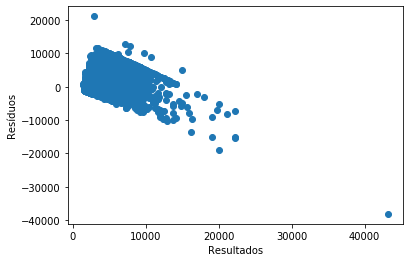

In [64]:
# Visualizando a distribuição dos resíduos

plt.scatter(resultado_area.fittedvalues, resultado_area.resid)
plt.xlabel('Resultados')
plt.ylabel('Resíduos')
# Apesar dos teste Durbin-Watson nao indicar autocorrelação, vemos que o erros não são aleatórios, o que pode prejudicar o modelo

In [65]:
# Agora para a variável número de quartos

model_quartos = sm.OLS.from_formula("aluguel ~ quartos", data=df)
resultado_quartos = model_quartos.fit()
resultado_quartos.summary()

# Vemos que o R é de 0.235, valor considerado baixo.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                aluguel   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     2515.
Date:                Wed, 26 Aug 2020   Prob (F-statistic):               0.00
Time:                        21:16:29   Log-Likelihood:                -76852.
No. Observations:                8231   AIC:                         1.537e+05
Df Residuals:                    8229   BIC:                         1.537e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    129.1402     75.220      1.717      0.086     -18.309     276.590
quartos     1474.2862     29.398     50.148      0.000    1416.658    1531.915
==============================================================================
Omnibus:                     2640.443   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8195.791
Skew:                           1.660   Prob(JB):                         0.00
Kurtosis:                       6.588   Cond. No.                         7.19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

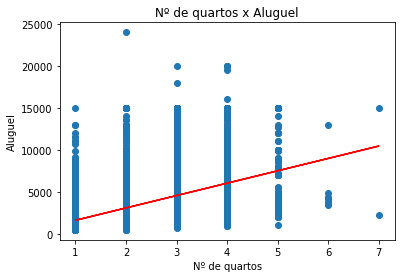

In [66]:
# Visualizando o modelo

plt.scatter(df.quartos, df.aluguel)
plt.plot(df.quartos, df.quartos*resultado_quartos.params['quartos'] + resultado_quartos.params['Intercept'], 'red')
plt.xlabel('Nº de quartos')
plt.ylabel('Aluguel')
plt.title('Nº de quartos x Aluguel')
plt.show()

In [67]:
# Buscando a correlação entre as duas variáveis independentes

df[["area", "quartos"]].corr()

# Vemos que há uma correlação forte entre as duas variáveis, que mostra que há multicolinearidade

,area,quartos
area,1.00000,0.14336
quartos,0.14336,1.00000


In [68]:
# Agora para a variável número de quartos

model_estac = sm.OLS.from_formula("aluguel ~ vagas_estacionamento", data=df)
resultado_estac = model_estac.fit()
resultado_estac.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                aluguel   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     4175.
Date:                Wed, 26 Aug 2020   Prob (F-statistic):               0.00
Time:                        21:16:30   Log-Likelihood:                -76261.
No. Observations:                8231   AIC:                         1.525e+05
Df Residuals:                    8229   BIC:                         1.525e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1575.9035     41.931     37.583      0.000    1493.708    1658.099
vagas_estacionamento  1470.6969     22.762     64.611      0.000    1426.077    1515.317
==============================================================================
Omnibus:                     2646.762   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9528.355
Skew:                           1.596   Prob(JB):                         0.00
Kurtosis:                       7.194   Cond. No.                         3.24
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
df.shape

(8231, 14)

In [70]:
model = sm.OLS.from_formula("aluguel ~ area + quartos + banheiros + vagas_estacionamento", data=df[df.cidade == 'São Paulo'])
resultado = model.fit()
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                aluguel   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     712.3
Date:                Wed, 26 Aug 2020   Prob (F-statistic):               0.00
Time:                        21:16:30   Log-Likelihood:                -39746.
No. Observations:                4273   AIC:                         7.950e+04
Df Residuals:                    4268   BIC:                         7.953e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1102.6723    103.764     10.627      0.000     899.241    1306.103
area                     0.3479      0.108      3.224      0.001       0.136       0.559
quartos                -95.0945     62.112     -1.531      0.126    -216.866      26.677
banheiros             1126.6171     53.753     20.959      0.000    1021.234    1232.000
vagas_estacionamento   560.8060     47.944     11.697      0.000     466.811     654.801
==============================================================================
Omnibus:                      904.719   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2495.034
Skew:                           1.118   Prob(JB):                         0.00
Kurtosis:                       6.002   Cond. No.                     1.15e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
df.aluguel.mean()

3582.276394119791

In [72]:
resultado.params['area']

0.34790785327610263

In [73]:
# Regressao com minimos quadrados entre aluguel e área

model_quartos = sm.OLS.from_formula("aluguel ~ area", data=df[df.cidade == 'São Paulo'])
resultado_area = model_quartos.fit()
resultado_area.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                aluguel   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     159.1
Date:                Wed, 26 Aug 2020   Prob (F-statistic):           7.51e-36
Time:                        21:16:30   Log-Likelihood:                -40760.
No. Observations:                4273   AIC:                         8.152e+04
Df Residuals:                    4271   BIC:                         8.154e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4237.7529     54.387     77.918      0.000    4131.126    4344.380
area           1.6686      0.132     12.615      0.000       1.409       1.928
==============================================================================
Omnibus:                     1153.220   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6105.074
Skew:                           1.188   Prob(JB):                         0.00
Kurtosis:                       8.353   Cond. No.                         435.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [75]:
#Vamos construir o modelo para São Paulo

df_sp = df[df.cidade == 'São Paulo']

X = df_sp[['area', 'quartos', 'banheiros', 'vagas_estacionamento', 'andar', 'animal', 'mobiliado']].values

y = df_sp['aluguel']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [77]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [78]:
y_pred = modelo.predict(X_test)

In [79]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1672.480404687216
Mean Squared Error: 5744853.973156959
Root Mean Squared Error: 2396.8425006989837


In [80]:
df_model = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Error': ((y_test-y_pred)/y_test*100)})
df_model.head(25)

,Actual,Predicted,Error
5347,2985,3123.833582,-4.651041
355,2100,2330.602690,-10.981080
6410,2570,3572.425870,-39.004898
310,1510,3280.739909,-117.267544
6222,5100,9011.782537,-76.701618
6742,3040,3767.516860,-23.931476
8192,1900,3449.259916,-81.539996
3392,12000,4790.937172,60.075524
9835,3500,2643.862641,24.461067
1739,8500,10228.972339,-20.340851


Este modelo o modelo de predição de preço possui uma precisão baixa. É possível que isso se dê pela falta de dados, como bairros dos imóveis.